In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

pd.set_option("display.max_columns", None)

# Regression Models of reviews from Dataset 1(Ave Rating) onto reviews from Dataset 2(5 review values)

In [2]:
# Read the csv file into a pandas DataFrame
data = pd.read_csv('./merged_df.csv')
data.head()

,Unnamed: 0,Name,key,Style,Style Key,Brewery,Description,ABV,Ave Rating,Min IBU,Max IBU,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,0,Double Bag,252,Altbier,8,Long Trail Brewing Co.,"Notes:This malty, full-bodied double alt is al...",7.2,3.9,25,50,12,57,18,33,55,16,0,24,35,12,84,94,Long Trail Brewing Co.,1019498330,4.0,4.0,4.0,Suds,Altbier,4.0,4.5,Double Bag,7.2,273
1,1,Double Bag,252,Altbier,8,Long Trail Brewing Co.,"Notes:This malty, full-bodied double alt is al...",7.2,3.9,25,50,12,57,18,33,55,16,0,24,35,12,84,94,Long Trail Brewing Co.,1113838346,4.5,4.0,4.0,canucklehead,Altbier,4.5,4.0,Double Bag,7.2,273
2,2,Double Bag,252,Altbier,8,Long Trail Brewing Co.,"Notes:This malty, full-bodied double alt is al...",7.2,3.9,25,50,12,57,18,33,55,16,0,24,35,12,84,94,Long Trail Brewing Co.,1295820502,3.5,4.0,4.0,ElliotNess,Altbier,3.5,3.0,Double Bag,7.2,273
3,3,Double Bag,252,Altbier,8,Long Trail Brewing Co.,"Notes:This malty, full-bodied double alt is al...",7.2,3.9,25,50,12,57,18,33,55,16,0,24,35,12,84,94,Long Trail Brewing Co.,1285456364,3.5,3.5,3.0,nerdrocker101,Altbier,3.5,3.5,Double Bag,7.2,273
4,4,Double Bag,252,Altbier,8,Long Trail Brewing Co.,"Notes:This malty, full-bodied double alt is al...",7.2,3.9,25,50,12,57,18,33,55,16,0,24,35,12,84,94,Long Trail Brewing Co.,1285293842,4.0,3.5,3.5,MaxBrewell,Altbier,3.5,4.0,Double Bag,7.2,273


In [3]:
X = data[['review_overall', 'review_aroma', 'review_appearance', 'review_palate', 'review_taste', 'review_palate']]
y = data['Ave Rating'].values.reshape(-1, 1)
print(X.shape)
print(y.shape)

(376882, 6)
(376882, 1)


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [5]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [6]:
# transform
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [7]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [8]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression()

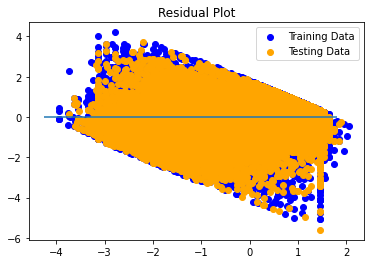

In [9]:
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), y_train_scaled - model.predict(X_train_scaled), c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), y_test_scaled - model.predict(X_test_scaled), c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [10]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.4002421921165147, R2: 0.5997276237815516


In [11]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.401813191280547, R2: 0.5981565061412573


In [12]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.4002421923846771, R2: 0.5997276235133691


In [13]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.40086812810059935, R2: 0.5991016405927597
